### **Miniproyecto1**

Santiago Montoya Londoño

Hanna Isabella Colorado M.

**cc:** 1037672299

**cc:** 1000408557

In [ ]:
#Descarga archivo base de dadtos

#https://drive.google.com/file/d/1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3/view?usp=drive_link
!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'

Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:00<00:00, 84.6MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy.signal as signal
import seaborn as sns
import pandas as pd

datos=sc.loadmat('s17.mat')
signals=datos['data']
etiquetas=datos['labels']
valencia=etiquetas[:,0]
arousal=etiquetas[:,1]

In [ ]:
def caracteristicas(signal):   #40x6528
  GSR=signal[36,:]
  xGSR=[]
  media=np.mean(GSR)
  xGSR.append(media)
  derivative=np.mean(np.diff(GSR))
  xGSR.append(derivative)

  fc=2.4
  fs=128
  wn=2*fc/fs
  filter=signal.butter(7, wn, btype='lowpass', analog=False, fs=fs, output='sos')
  filtered = signal.sosfilt(filter, GSR)

  f, t, Zxx = signal.stft(filtered, fs, nperseg=512) # generar STFT

  xPleth=[]
  pleth=signal[38,:]
  media=np.mean(pleth)
  des=np.std(pleth)
  xPleth.append(media)
  xPleth.append(des)
  media=np.mean(np.diff(pleth))
  des=np.std(np.diff(pleth))
  xPleth.append(media)
  xPleth.append(des)

  xRes=[]
  res=signal[37,:]
  derivative=np.mean(np.diff(res))
  xRes.append(derivative)

  peaks,_=signal.find_peaks(res,distance=128, height=0)
  time=[]
  for i in range(len(peaks)-1):
    time.append((peaks[i+1]-peaks[i])/fs)
  media=np.mean(time)
  xRes.append(media)

  xTemp=[]
  temp=signal[39,:]
  media=np.mean(temp)
  derivative=np.mean(np.diff(temp))
  xTemp.append(media)
  xTemp.append(derivative)

  xEOG=[]
  xEMG=[]
  hEOG=signal[32,:]
  vEOG=signal[33,:]

  zEMG=signal[34,:]
  tEMG=signal[35,:]

  M=[hEOG,vEOG,zEMG,tEMG]
  for i in range(4):
    energy=np.sum(np.abs(M[i])**2)
    media=np.mean(M[i])
    variance=np.std(M[i])**2
    if i==0 or i==1:
      xEOG.append(energy)
      xEOG.append(media)
      xEOG.append(variance)
    else:
      xEMG.append(energy)
      xEMG.append(media)
      xEMG.append(variance)

1.4265625


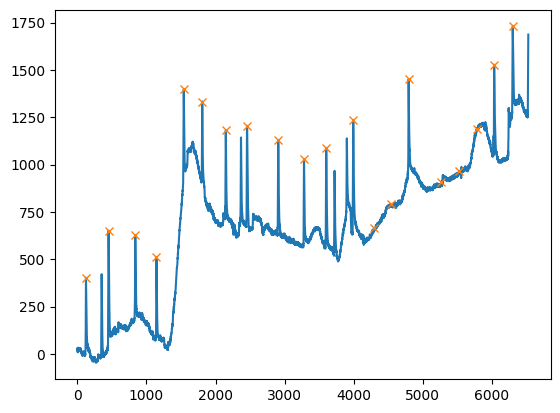

[142173392.15895492, -107.96248050643713, 10123.115082148855, 3825970180.3018503, 675.3741015353701, 129955.9412813347]
[766940634.1128076, -316.47444108517305, 17328.70664975496, 310552774.7363242, 186.51995732665324, 12782.728119403317]
(257, 27)


In [ ]:
gsr=signals[0,36,:]
fc=2.4
fs=128
wn=2*fc/fs
filter=signal.butter(7, wn, btype='lowpass', analog=False, fs=fs, output='sos')
filtered = signal.sosfilt(filter, gsr)

f, t, Zxx = signal.stft(filtered, fs, nperseg=512) # generar STFT
power=(np.abs(Zxx)**2)/len(Zxx)

prueba=[]
pleth=signals[0,38,:]
media=np.mean(pleth)
des=np.std(pleth)

res=signals[0,37,:]
derivative=np.mean(np.diff(res))

peaks,_=signal.find_peaks(res,distance=128, height=0)
time=[]
for i in range(len(peaks)-1):
  time.append((peaks[i+1]-peaks[i])/fs)
print(np.mean(time))

temp=signals[0,39,:]

hEOG=signals[0,32,:]
vEOG=signals[0,33,:]

zEMG=signals[0,34,:]
tEMG=signals[0,35,:]

xEOG=[]
xEMG=[]
M=[hEOG,vEOG,zEMG,tEMG]
for i in range(4):
  energy=np.sum(np.abs(M[i])**2)
  media=np.mean(M[i])
  variance=np.std(M[i])**2
  if i==0 or i==1:
    xEOG.append(energy)
    xEOG.append(media)
    xEOG.append(variance)
  else:
    xEMG.append(energy)
    xEMG.append(media)
    xEMG.append(variance)

peaks,_=signal.find_peaks(vEOG,distance=250)
plt.plot(vEOG)
plt.plot(peaks, vEOG[peaks], "x")
plt.show()
print(xEOG)
print(xEMG)